In [23]:
import pandas as pd
df = pd.read_csv('rec_69.csv')
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1
0,1970Q1,B.J. Thomas,3.0,False,1.0,1,Raindrops Keep Fallin' On My Head,10.0,4939.759
1,1970Q1,"Peter, Paul & Mary",2.0,False,1.0,2,Leaving On A Jet Plane,11.0,4939.759
2,1970Q1,Diana Ross & The Supremes,1.0,False,1.0,3,Someday We'll Be Together,9.0,4939.759
3,1970Q1,Creedence Clearwater Revival,4.0,False,3.0,4,Down On The Corner/Fortunate Son,11.0,4939.759
4,1970Q1,Steam,5.0,False,1.0,5,Na Na Hey Hey Kiss Him Goodbye,12.0,4939.759
...,...,...,...,...,...,...,...,...,...
3035,1970Q1,The New Seekers,NaN,NaN,NaN,96,Look What They Done To My Song Ma,NaN,4939.759
3036,1970Q1,R Dean Taylor,NaN,NaN,NaN,97,Indiana Wants Me,NaN,4939.759
3037,1970Q1,Jimi Hendrix,NaN,NaN,NaN,98,Voodoo Chile,NaN,4939.759
3038,1970Q1,The Supremes,NaN,NaN,NaN,99,Stoned Love,NaN,4939.759


In [24]:
df['rank_gain/loss'] = df['track_lp'] - df['track_rank']
df.dropna(inplace=True)
df



,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss
0,1970Q1,B.J. Thomas,3.0,False,1.0,1,Raindrops Keep Fallin' On My Head,10.0,4939.759,2.0
1,1970Q1,"Peter, Paul & Mary",2.0,False,1.0,2,Leaving On A Jet Plane,11.0,4939.759,0.0
2,1970Q1,Diana Ross & The Supremes,1.0,False,1.0,3,Someday We'll Be Together,9.0,4939.759,-2.0
3,1970Q1,Creedence Clearwater Revival,4.0,False,3.0,4,Down On The Corner/Fortunate Son,11.0,4939.759,0.0
4,1970Q1,Steam,5.0,False,1.0,5,Na Na Hey Hey Kiss Him Goodbye,12.0,4939.759,0.0
...,...,...,...,...,...,...,...,...,...,...
2935,1970Q4,Dionne Warwick,46.0,False,45.0,45,The Green Grass Starts To Grow,5.0,4938.857,1.0
2936,1970Q4,Neil Young,43.0,False,33.0,46,Only Love Can Break Your Heart,11.0,4938.857,-3.0
2937,1970Q4,Diana Ross,74.0,False,47.0,47,Remember Me,2.0,4938.857,27.0
2938,1970Q4,Judy Collins,58.0,False,48.0,48,Amazing Grace,4.0,4938.857,10.0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="rank_gain/loss")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

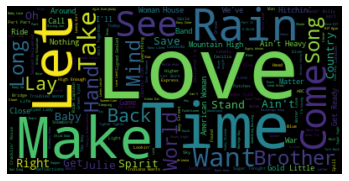

In [26]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.track_title)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [27]:
df = df[df['rank_gain/loss'] != 0]
df['sentiment'] = df['rank_gain/loss'].apply(lambda rating : +1 if rating > 0 else -1)

C:\Users\java\AppData\Local\Temp\ipykernel_15608\701095560.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss,sentiment
0,1970Q1,B.J. Thomas,3.0,False,1.0,1,Raindrops Keep Fallin' On My Head,10.0,4939.759,2.0,1
2,1970Q1,Diana Ross & The Supremes,1.0,False,1.0,3,Someday We'll Be Together,9.0,4939.759,-2.0,-1
5,1970Q1,Led Zeppelin,9.0,False,6.0,6,Whole Lotta Love,7.0,4939.759,3.0,1
6,1970Q1,Jackson 5,8.0,False,7.0,7,I Want You Back,8.0,4939.759,1.0,1
7,1970Q1,The Shocking Blue,19.0,False,8.0,8,Venus,4.0,4939.759,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2935,1970Q4,Dionne Warwick,46.0,False,45.0,45,The Green Grass Starts To Grow,5.0,4938.857,1.0,1
2936,1970Q4,Neil Young,43.0,False,33.0,46,Only Love Can Break Your Heart,11.0,4938.857,-3.0,-1
2937,1970Q4,Diana Ross,74.0,False,47.0,47,Remember Me,2.0,4938.857,27.0,1
2938,1970Q4,Judy Collins,58.0,False,48.0,48,Amazing Grace,4.0,4938.857,10.0,1


In [29]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

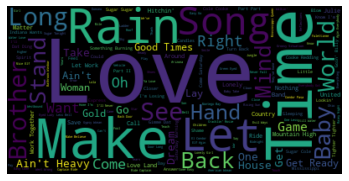

In [30]:
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.track_title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

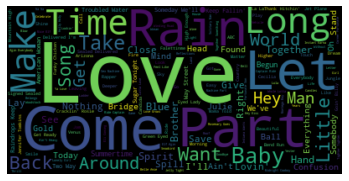

In [31]:
neg = " ".join(review for review in negative.track_title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [32]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

C:\Users\java\AppData\Local\Temp\ipykernel_15608\1108073838.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\java\AppData\Local\Temp\ipykernel_15608\1108073838.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df['track_title'].value_counts()[:8]

Get Ready                          19
Band Of Gold                       19
Hitchin' A Ride                    16
Indiana Wants Me                   15
Make It With You                   15
Cracklin' Rosie                    15
Which Way You Goin' Billy?         15
American Woman/No Sugar Tonight    15
Name: track_title, dtype: int64

In [34]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['track_title'] = df['track_title'].apply(remove_punctuation)
df = df.dropna(subset=['track_title'])

C:\Users\java\AppData\Local\Temp\ipykernel_15608\3186846728.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
dfNew = df[['track_title','sentiment']]
dfNew.head()

,track_title,sentiment
0,Raindrops Keep Fallin' On My Head,1
2,Someday We'll Be Together,-1
5,Whole Lotta Love,1
6,I Want You Back,1
7,Venus,1


In [36]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['track_title'])
test_matrix = vectorizer.transform(test['track_title'])

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [39]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [40]:
lr.fit(X_train,y_train)

LogisticRegression()

In [41]:
predictions = lr.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 42,  40],
       [137, 333]], dtype=int64)

In [43]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.23      0.51      0.32        82
           1       0.89      0.71      0.79       470

    accuracy                           0.68       552
   macro avg       0.56      0.61      0.56       552
weighted avg       0.79      0.68      0.72       552

